### Prototipo Pasabanda  

| f1 | fc | f2 |  Q  |
|:--:|:--:|:--:|:---:|
| 0,6 KHz | 6 KHz | 60 KHz | 3 |

| ⍺máx [dB] | ⍺mín1 [dB] | ⍺mín2 [dB] | Wo | Ws1 | Ws2 |
|:----------------:|:-----------------:|:-----------------:|:-------:|:----------:|:----------:|
|      2,5      |       15    |       15        |    1    |  0,1  |  10  | 

$ \Omega_{s1} = Q \cdot \frac{W_{s1}^2 - 1}{W_{s1}} = -29,7 $  
$ \Omega_{s2} = Q \cdot \frac{W_{s2}^2 - 1}{W_{s2}} =  29,7 $  

### Prototipo Pasabajos
| ⍺máx [dB] | ⍺mín [dB] | W0  | Ws  |
| --------- | --------- | ------- | ------- |
| 2,5 | 15 | 1 | 29,7 |

### Diseño de Chebyshev
$ \epsilon^2 = 10^{\frac{\alpha_{max}}{10}} - 1 = 10^{\frac{2,5}{10}} - 1 = 0,77827941 $  
$ \alpha_{min} = 15 dB <= 10 log(1 + \epsilon^2 \cdot cosh{(n \cdot cosh(W_s)^{-1})}^2) $  
N = 1 -> 33 dB

In [9]:
import math as m

alpha_max = 2.5    # dB
alpha_min = 15   # dB
w_s_lp = 29.7

epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
N = m.acosh((m.sqrt(m.pow(10, alpha_min * 0.1) - 1)) / epsilon) / (m.acosh(w_s_lp))
N = m.ceil(N)

alpha = 10 * m.log(1 + epsilon**2 * m.cosh(N * m.acosh(w_s_lp))**2)

print(f'epsilon: {epsilon}, N: {N} , Alpha: {alpha}')

epsilon: 0.8822014566066657, N: 1 , Alpha: 65.33079989086727


### Calculo de Chebyshev

$ C_0 = 1 $  
$ C_1 = W $  

$ |T(jw)|^2 = \frac{1}{1 + \epsilon^2 \cdot (W)^2} $  
$ |T(s)|^2_{W = \frac{s}{j}} = \frac{1}{1 - \epsilon^2 \cdot s^2 } $  
$ |T(s)|^2 = T(s) \cdot T(-s) = \frac{1}{1 + \epsilon^2 \cdot s} \cdot \frac{1}{1 - \epsilon^2 \cdot s} $   

### Transformación pasabanda

$ p = Q \cdot \frac{s^2 + 1}{s} $  
$ T(Q \cdot \frac{s^2 + 1}{s}) = \frac{1}{\epsilon^2 \cdot (Q \cdot \frac{s^2 + 1}{s}) + 1} $    
$ T(Q \cdot \frac{s^2 + 1}{s}) = \frac{s}{\epsilon^2 \cdot Q \cdot (s^2 + 1) + s} $    
$ T(Q \cdot \frac{s^2 + 1}{s}) = \frac{\frac{s}{\epsilon^2 \cdot Q}}{s^2 + \frac{s}{\epsilon^2 \cdot Q} + 1} $  
$ T(s) = \frac{\frac{s}{2,33483}}{s^2 + \frac{s}{2,33483} + 1} $  

(2, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

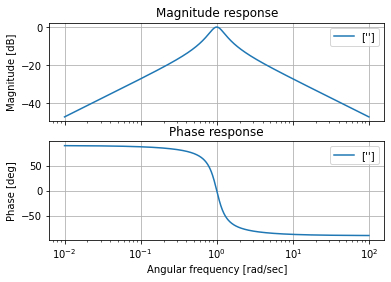

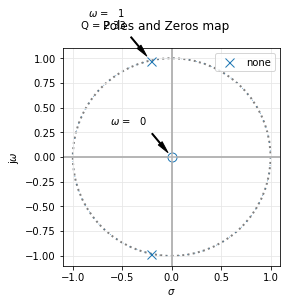

In [13]:
from splane import pzmap, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Transferencia

W0 = 1
Q  = 2.33483
K  = 1

numerador   = [K * W0/Q, 0] 
denominador = [1 , W0/Q , W0**2]

my_tf = TransferFunction(numerador, denominador)

bodePlot(my_tf,1)

pzmap(my_tf,2)